In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score

In [37]:
# UNCOMMENT THE "CCA_U_PATH" THAT YOU WANT TO USE IN CLUSTERING FOR THE REST OF THE NOTEBOOK
# ONLY USE CCA_* and rCCA_*; for other files, you will need to edit downstream code

# CCA_pval0.001_thresh
#CCA_U_path = "/Users/fyzeen/FyzeenLocal/GitHub/DrysdaleReplication/code/03_FeatureSelection/02_rCCA/Results/CCA_pval0.001_thresh/CCA_U.csv"

# CCA_pval0.005_thresh
#CCA_U_path = "/Users/fyzeen/FyzeenLocal/GitHub/DrysdaleReplication/code/03_FeatureSelection/02_rCCA/Results/CCA_pval0.005_thresh/CCA_U.csv"
# FOR THIS ONE YOU COULD ALSO USE CV4 and CV7 (column indices 3 and 6) bc they somewhat match loadings of Drysdale's CVs

# CCA_top150 connectivity features
#CCA_U_path = "/Users/fyzeen/FyzeenLocal/GitHub/DrysdaleReplication/code/03_FeatureSelection/02_rCCA/Results/CCA_top150/CCA_U.csv"

# 10-fold Cross-Validated CCA pval 0.001
#CCA_U_path = "/Users/fyzeen/FyzeenLocal/GitHub/DrysdaleReplication/code/03_FeatureSelection/02_rCCA/Results/cvCCA_pval0.001_thresh/cvCCA_U.csv"

# 10-fold Cross-Validated CCA pval 0.005
#CCA_U_path = "/Users/fyzeen/FyzeenLocal/GitHub/DrysdaleReplication/code/03_FeatureSelection/02_rCCA/Results/cvCCA_pval0.005_thresh/cvCCA_U.csv"

# 100-fold Cross-Validated CCA pval 0.001
#CCA_U_path = "/Users/fyzeen/FyzeenLocal/GitHub/DrysdaleReplication/code/03_FeatureSelection/02_rCCA/Results/cvCCA_100fold_pval0.001_thresh/cvCCA_U.csv"

# rCCA_pval0.001_thresh
#CCA_U_path = "/Users/fyzeen/FyzeenLocal/GitHub/DrysdaleReplication/code/03_FeatureSelection/02_rCCA/Results/rCCA_pval0.001_thresh/rCCA_U.csv"

# rCCA_pval0.001_thresh_GrosenickTests (similar number of test subjects to Grosenick)
#CCA_U_path = "/Users/fyzeen/FyzeenLocal/GitHub/DrysdaleReplication/code/03_FeatureSelection/02_rCCA/Results/rCCA_pval0.001_thresh_GrosenickNumTest/rCCA_U.csv"

# rCCA_top150 connectivity features
CCA_U_path = "/Users/fyzeen/FyzeenLocal/GitHub/DrysdaleReplication/code/03_FeatureSelection/02_rCCA/Results/rCCA_top150/rCCA_U.csv"


CCA_U = pd.read_csv(CCA_U_path)

In [38]:
# If using rCCA, uncomment the second line; if using CCA, uncomment the first line

#data = CCA_U[["U1", "U2"]]
data = CCA_U[["Var1", "Var2"]]


data = data.to_numpy()

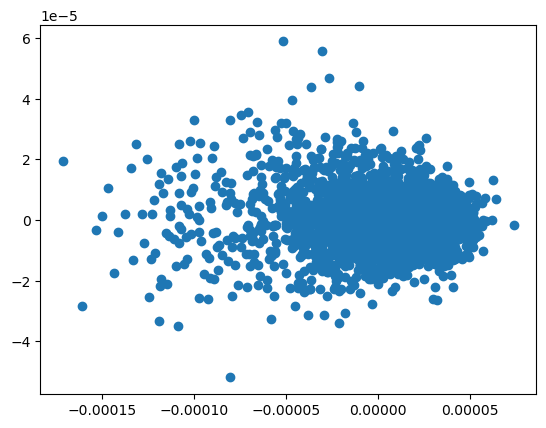

In [39]:
plt.scatter(data[:, 0], data[:, 1])

In [40]:
# Cluster range ∈ [2,11)
cluster_range = range(2, 11)

# Initialize lists to store scores
silhouette_scores = []
variance_ratios = []

# Perform hierarchical clustering for each number of clusters
for n_clusters in cluster_range:
    # Perform hierarchical clustering
    linkage_matrix = linkage(data, method='ward')
    labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

    
    # Compute silhouette score
    silhouette_scores.append(silhouette_score(data, labels))
    
    # Compute variance ratio criterion
    variance_ratios.append(calinski_harabasz_score(data, labels))

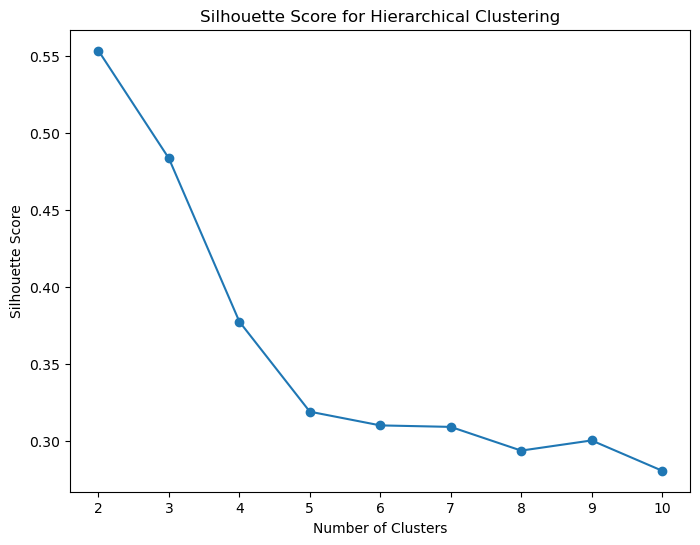

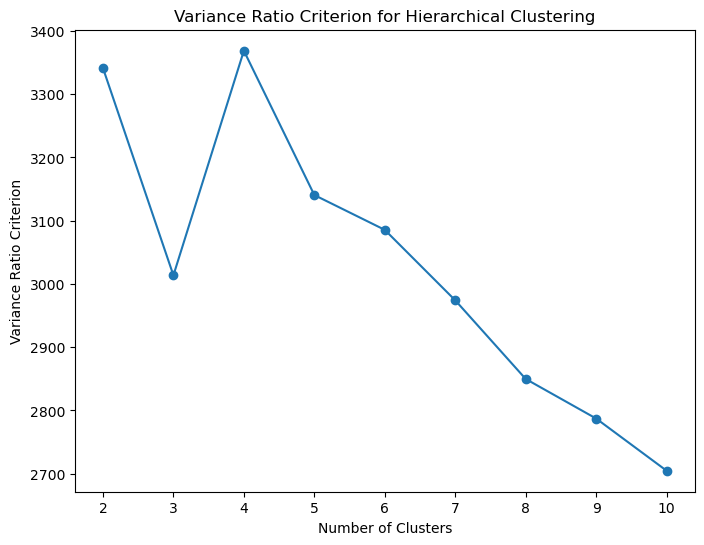

In [41]:
# Plot the silhouette score
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.show()

# Plot the variance ratio criterion
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, variance_ratios, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Variance Ratio Criterion')
plt.title('Variance Ratio Criterion for Hierarchical Clustering')
plt.show()

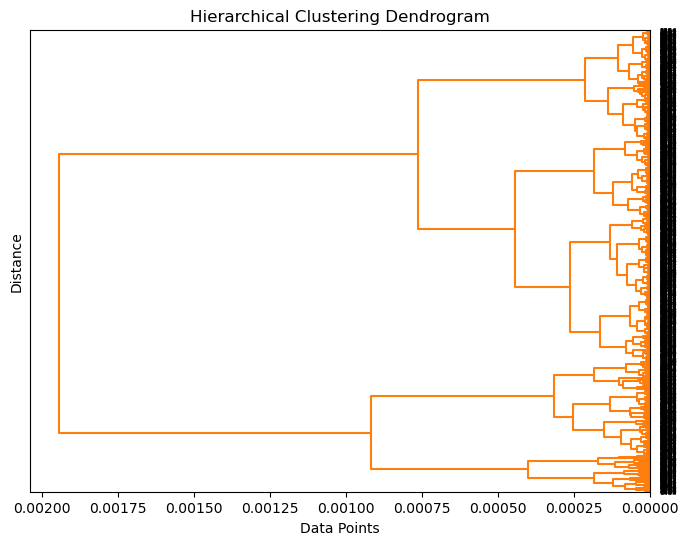

In [46]:
# Perform hierarchical clustering with the optimal number of clusters
linkage_matrix = linkage(data, method='ward')
labels = fcluster(linkage_matrix, t=2, criterion='maxclust')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(linkage_matrix, orientation='left', distance_sort='descending', color_threshold=30) # Mess around with this color_threshold var to get the right number of cluster colors
plt.show()

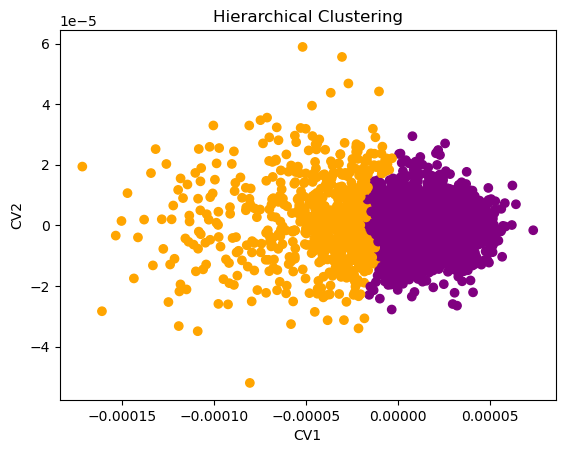

In [47]:
# Plot the scatter plot with colored clusters

# Custom colors to match the dendrogram
colors = ['purple', 'red', 'green', 'orange']
cmap = ListedColormap(colors)

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap)
plt.xlabel('CV1')
plt.ylabel('CV2')
plt.title('Hierarchical Clustering')
plt.show()

In [49]:
out = pd.DataFrame(labels, CCA_U["Row"])
out = out.rename(columns={0:"Cluster"})
out.index.name = "eid"
out
#out.to_csv("rCCA_150Features_2ClusterSoln.csv")